<a href="https://colab.research.google.com/github/mahi97/QA-TagPrediction/blob/main/Project_LP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question Answering Tag Prediction

## Datasets: (stackoverflow, mathoverflow)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls /content/drive/MyDrive/DM/Project/stackoverflow

answerer_info_stackoverflow.txt  train_query_stackoverflow.txt
test_predict_stackoverflow.txt	 valid_answer_stackoverflow.txt
test_query_stackoverflow.txt	 valid_predict_stackoverflow.txt
train_answer_stackoverflow.txt	 valid_query_stackoverflow.txt


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from functools import reduce


DATASETS = ['mathoverflow', 'stackoverflow']
BASE_DIR = '/content/drive/MyDrive/DM/Project/'
# BASE_DIR = './'
ANSWER = 'answerer_info_{}.txt'
TAG_TRAIN = 'train_answer_{}.txt'
TAG_VALID = 'valid_answer_{}.txt'
Q_TRAIN = 'train_query_{}.txt'
Q_TEST = 'test_query_{}.txt'
Q_VALID = 'test_query_{}.txt'
PREDICT_VALID = 'valid_predict_{}.txt'
PREDICT_TEST = 'test_predict_{}.txt'

## 1. Data Preproccesing


In [4]:
def get_answer_info(dataset_id):
    q2a = {}
    a2q = {}
    lines = open(os.path.join(BASE_DIR, DATASETS[dataset_id], ANSWER.format(DATASETS[dataset_id])), "r")
    
    for user, line in enumerate(lines.readlines()):
        l = line.replace('\n', '').split(' ')
        a = user
        a2q[a] = []
        for q in l:
            q = int(q)
            a2q[a].append(q)
            if q not in q2a:
                q2a[q] = []
            q2a[q].append(a)
    return q2a, a2q

def get_train_tag(dataset_id, _q2a, _a2q):
    _q2t = {}
    _t2q = {}
    _a2t = {}
    _t2a = {}
    _qa  = {}
    for a in _a2q.keys():
        _a2t[a] = []
    
    qtions = open(os.path.join(BASE_DIR, DATASETS[dataset_id], Q_TRAIN.format(DATASETS[dataset_id])), "r")
    tag = open(os.path.join(BASE_DIR, DATASETS[dataset_id], TAG_TRAIN.format(DATASETS[dataset_id])), "r")
    for qtion, tags in zip(qtions.readlines(), tag.readlines()):
        tags = tags.replace('\n', '').split(' ')
        q = int(qtion.replace('\n', ''))
        _qa[q] = _q2a[q]
        _q2t[q] = []
        answerers = _q2a[q]
        for t in tags:
            t = int(t)
            _q2t[q].append(t)
            [_a2t[a].append(t) for a in answerers]
            if t not in _t2a:
                _t2a[t] = []
            if t not in _t2q:
                _t2q[t] = []
            _t2a[t].extend(answerers)
            _t2q[t].append(q)
    return _qa, _a2t, _q2t, _t2q, _t2a

In [5]:
def get_valid_tag(dataset_id, _q2a, _a2q):
    _q2t = {}
    _t2q = {}
    _a2t = {}
    _t2a = {}
    _qs  = []
    for a in _a2q.keys():
        _a2t[a] = []
    
    qtions = open(os.path.join(BASE_DIR, DATASETS[dataset_id], Q_VALID.format(DATASETS[dataset_id])), "r")
    tag = open(os.path.join(BASE_DIR, DATASETS[dataset_id], TAG_VALID.format(DATASETS[dataset_id])), "r")
    for qtion, tags in zip(qtions.readlines(), tag.readlines()):
        tags = tags.replace('\n', '').split(' ')
        q = int(qtion.replace('\n', ''))
        _qs.append(q)
        _q2t[q] = []
        answerers = _q2a[q]
        for t in tags:
            t = int(t)
            _q2t[q].append(t)
            [_a2t[a].append(t) for a in answerers]
            if t not in _t2a:
                _t2a[t] = []
            if t not in _t2q:
                _t2q[t] = []
            _t2a[t].extend(answerers)
            _t2q[t].append(q)
    return _qs, _a2t, _q2t, _t2q, _t2a

In [6]:
def get_test_query(dataset_id):
    q = []
    qtions = open(os.path.join(BASE_DIR, DATASETS[dataset_id], Q_VALID.format(DATASETS[dataset_id])), "r")
    for qtion in qtions.readlines():
        q.append(int(qtion.replace('\n', '')))
    return q

In [7]:
def show_histogram(data, bins='auto', unique=True, xl='', yl='', title=''):
    plt.figure(figsize=(8,5))
    if unique:
        hist = [len(np.unique(v)) for v in data.values()]
    else:  
        hist = [len(v) for v in data.values()]
    print(min(hist), max(hist), np.median(hist), np.mean(hist), np.std(hist), len(hist))
    _ = plt.hist(hist, bins=bins)  # arguments are passed to np.histogram
    plt.title(title)
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.show()

def histogram(hist, bins='auto', unique=True):
    if len(hist):
        print(min(hist), max(hist), np.mean(hist), np.std(hist), len(hist))
        _ = plt.hist(hist, bins=bins)  # arguments are passed to np.histogram
        plt.title("Histogram with {} bins".format(bins))
        plt.show()

In [8]:
dataset_id = 1
q2a, a2q = get_answer_info(dataset_id)
t_q2a, a2t, q2t, t2q, t2a = get_train_tag(dataset_id, q2a, a2q)
v_q, v_a2t, v_q2t, v_t2q, v_t2a = get_valid_tag(dataset_id, q2a, a2q)
t_q = get_test_query(dataset_id)

2 1682 4.0 11.569131220858312 43.98697354963338 10509


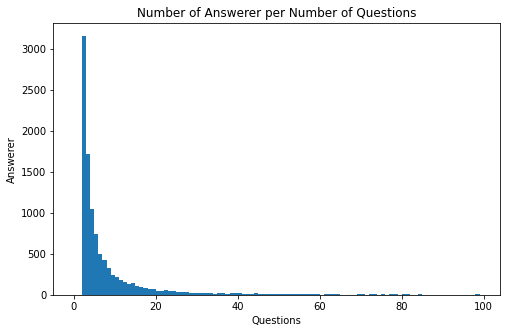

In [9]:
show_histogram(a2q, range(100), xl='Questions', yl='Answerer', title='Number of Answerer per Number of Questions')

1 12 1.0 1.0163002591323247 0.1371487670037999 119630


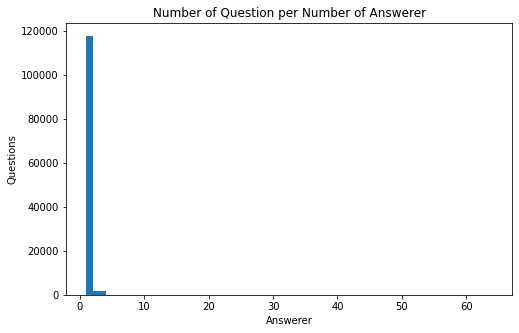

In [10]:
show_histogram(q2a, [2 ** i for i in range(7)], xl='Answerer', yl='Questions', title='Number of Question per Number of Answerer')

1 6 3.0 2.8069986625428403 1.1728671022627521 95704


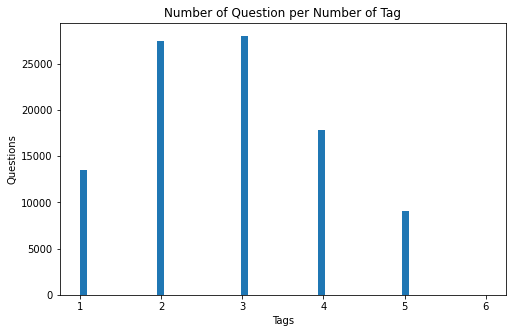

In [11]:
show_histogram(q2t, xl='Tags', yl='Questions', title='Number of Question per Number of Tag')

1 10169 7.0 39.55256183745583 288.27579694683584 6792


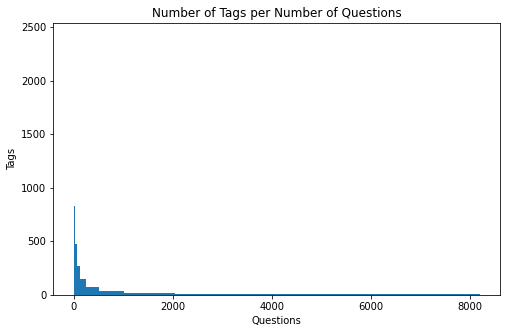

In [12]:
show_histogram(t2q, [2 ** i for i in range(14)], xl='Questions', yl='Tags', title='Number of Tags per Number of Questions')

1 3896 7.0 29.014428739693756 134.69917874767435 6792


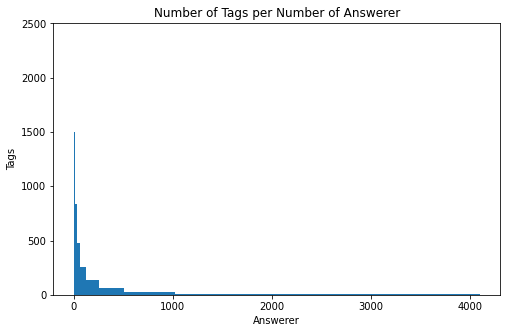

In [13]:
show_histogram(t2a, [2 ** i for i in range(13)], xl='Answerer', yl='Tags', title='Number of Tags per Number of Answerer')

0 1253 8.0 18.752117232848036 43.39175439143453 10509


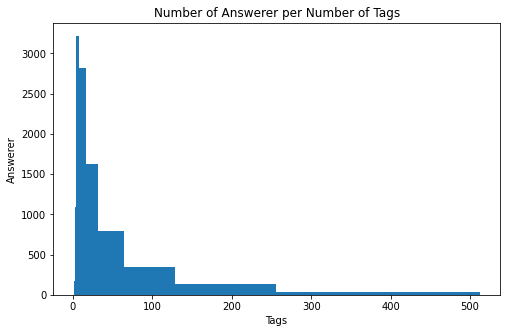

In [14]:
show_histogram(a2t, [2 ** i for i in range(10)], xl='Tags', yl='Answerer', title='Number of Answerer per Number of Tags')

In [15]:
q2at = {}

for q, a in q2a.items():
  if q not in q2at:
    q2at[q] = []
  for answerer in a:
    q2at[q].extend(a2t[answerer])

0 1691 61.0 179.27640224024074 274.1661434535563 119630


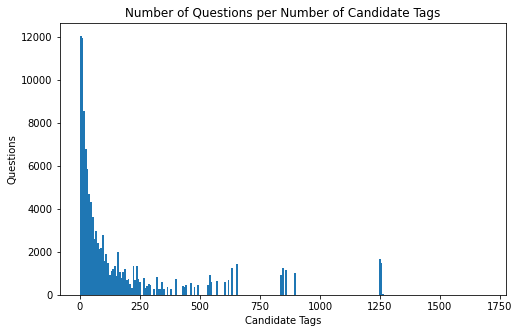

In [16]:
show_histogram(q2at, xl='Candidate Tags', yl='Questions', title='Number of Questions per Number of Candidate Tags')

## 2. Baseline Methods

In [17]:
from itertools import chain, combinations

def powerset(s, r):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    return combinations(s, r)

def powerset2(s):
    "powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)"
    return chain.from_iterable(combinations(s, r) for r in range(1, len(s)+1))

In [18]:
def get_pop_score(_t2q, _a2q, _q2a, _q2t, iter):
  t2s = {}
  q2s = {}
  a2s = {}

  iter = 30
  for t in _t2q:
    t2s[t] = 1
  
  for it in tqdm(range(iter)):
    tt = [t for t, s in t2s.items() if s > 0.0]

    for t in tt:
      for q in _t2q[t]:
        if q not in q2s:
          q2s[q] = 0.0
        q2s[q] += t2s[t] / len(_t2q[t])
    n_t2s = t2s
    t2s = {} 
    qq = [q for q, s in q2s.items() if s > 0.0]     
    for q in qq:
      for a in _q2a[q]:
        if a not in a2s:
          a2s[a] = 0.0
        a2s[a] += q2s[q] / len(_q2a[q])
    q2s = {}
    aa = [a for a, s in a2s.items() if s > 0.0]
    for a in aa:
      qt = [q for q in _a2q[a] if q in _q2t]
      for q2 in qt:
        if q2 not in q2s:
          q2s[q2] = 0.0
        q2s[q2] += a2s[a] / len(qt)
    a2s = {}
    qq = [q for q, s in q2s.items() if s > 0.0]
    for q in qq:     
      if q in _q2t:
        for t in _q2t[q]:
          if t not in t2s:
            t2s[t] = 0.0
          t2s[t] += q2s[q] / len(_q2t[q])
    q2s = {}
    diff = 0.0
    for t in t2s:
      if t in n_t2s:
        diff += abs(t2s[t] - n_t2s[t])
      else:
        diff += t2s[t]
    for t in n_t2s:
      if t not in t2s:
        diff += n_t2s[t]
    s = np.argsort([-s for s in t2s.values()])
    h = [t for t in t2s.keys()]
    f = [h[s] for s in s[:5]]
  return t2s

In [19]:
def get_support_set(_q2t, max_tag_set):
    tag_set = [{} for i in range(max_tag_set)]
    for q, t in _q2t.items():
        for r in range(max_tag_set):
            t = np.sort(t)
            for p in powerset(t, r+1):
                if p not in tag_set[r]:
                    tag_set[r][p] = 0
                tag_set[r][p] += 1
    support_tag = {}
    total = len(_q2t)
    for i in range(max_tag_set):
        for t, c in tag_set[i].items():
            support_tag[t] = c/total
    return support_tag

In [20]:
def get_answerer_conf(_a2q, _q2t, max_tag_set):
    at2s = {}
    for a, qs in _a2q.items():
        supp_a = len(_a2q[a]) / sum([len(v) for v in _a2q.values()])
        total = sum([len(v) for v in q2at.values()])
        tag_set = {}
        for q in qs:
            if q not in _q2t:
                continue
            t = _q2t[q]
            t = np.sort(t)    
            for r in range(max_tag_set):
                for p in powerset(t, r+1):
                    if p not in tag_set:
                        tag_set[p] = 0
                    tag_set[p] += 1 / supp_a / total
        
        at2s[a] = tag_set
    return at2s

In [21]:
def get_answerer_tag_score(_a2q, _q2t, _t2s, max_tag_set, split1=True, split2=True):
  at2s = {}
  qt2s = {}
  at2s = {}
  for t, v in t2s.items():
    for q in t2q[t]:
      if q not in qt2s:
        qt2s[q] = {}
      if t not in qt2s[q]:
        qt2s[q][t] = 0.0
      qt2s[q][t] += v / len(t2q[t]) if split1 else v
  for q, v in qt2s.items():
    for a in q2a[q]:
      if a not in at2s:
        at2s[a] = {}
      for t, s in v.items():
        if t not in at2s[a]:
          at2s[a][t] = 0.0
        at2s[a][t] += s / len(q2a[q]) if split2 else s

  return at2s

In [22]:
def get_tag_score(question, candidate_tags, support_tag):
    ## PART.1 Tag Score from Answrer Confident
    values = candidate_tags[question]

    ## Part.2 Tag Score from Tag Supports
    scores = [support_tag[t] for t in candidate_tags[question].keys()]

    scores = []
    conf = []
    final = []
    tags = []
    for tag in candidate_tags[question].keys():
        tags.append(tag)
        scores.append(-support_tag[tag])
        conf.append(-values[tag])
        final.append(conf[-1] + scores[-1])
    return tags, scores, conf, final

In [23]:
def predict(questions, candidates, a2q, a2t, q2t, st):
    s = {}
    c = {}
    f = {}
    t = {}
    for q in tqdm(questions):
        t[q], s[q], c[q], f[q] = get_tag_score(q, candidates, st)
        
    return t, s, c, f

In [24]:
def get_tag_score2(question, q2a, at2s):
  t2s = {}
  for a in q2a[question]:
    if a in at2s:
      for t, s in at2s[a].items():
        if t not in t2s:
          t2s[t] = 0.0
        t2s[t] += s


  final = []
  tags = []
  for tag, score in t2s.items():
    tags.append(tag)
    final.append(-score)
  return tags, final

def predict2(questions, at2s, a2q, a2t, q2t, st):
    f = {}
    t = {}
    for q in tqdm(questions):
        t[q], f[q] = get_tag_score2(q, q2a, at2s)
        
    return t, f

def choose_tag5(questions, t, f, s, c, cnt):
    q2t = {}
    for q in tqdm(questions):
        q2t[q] = []
        tags = t[q]
        finals = f[q]
        top = [tuple([tags[i]]) for i in np.argsort(finals)[:cnt]]
        q2t[q] = top
    return q2t

## 4. Similarity

In [25]:
def find_similar(q, q2a, q2t):
  sim = {}
  answerers = q2a[q]
  for a in answerers:
    for q2 in a2q[a]:
      if q2 != q:
        sim[q2] = len(set(answerers).intersection(set(q2a[q2]))) / len(set(answerers).union(set(q2a[q2])))
  return sim

def find_tag(q, sim, q2t):
  tag = {}
  for q2, w in sim.items():
    if q2 in q2t:
      for t in q2t[q2]:
        if t not in tag:
          tag[t] = 0.0
        tag[t] += w
  return tag

def find_score(question, candidate_tags, support_tag):
    ## PART.1 Tag Score from Answrer Confident
    values = candidate_tags[question]

    ## Part.2 Tag Score from Tag Supports
    scores = [support_tag[tuple([t])] for t in candidate_tags[question].keys()]

    scores = []
    conf = []
    final = []
    tags = []
    for tag in candidate_tags[question].keys():
        tags.append(tag)
        scores.append(-support_tag[tuple([tag])])
        conf.append(-values[tag])
        final.append(-abs(conf[-1] * scores[-1]))
    return tags, scores, conf, final

def find_candidate(questions):
  candidate = {}
  for q in questions:
    sim = find_similar(q, q2a, q2t)
    tag = find_tag(q, sim, q2t)
    candidate[q] = tag
  return candidate

def find_predict(questions, candidates, st):
    s = {}
    c = {}
    f = {}
    t = {}
    for q in tqdm(questions):
        t[q], s[q], c[q], f[q] = find_score(q, candidates, st)
        
    return t, s, c, f
def choose_tag4(questions, t, s, c, f, cnt):
    q2t = {}
    for q in tqdm(questions):
        q2t[q] = []
        tags = t[q]
        confs = c[q]
        scores = s[q]
        finals = f[q]
        top = [tuple([tags[i]]) for i in np.argsort(finals)[:cnt]]
        # top = [tags[tuple([i])] for i in np.argsort(scores)[:cnt]]
        # top = [tuple([tags[i]]) for i in np.argsort(confs)[:cnt]]

        q2t[q] = top
    return q2t

## Community Detection

In [26]:
def choose_edges_by_betweenness_centrality(graph, eps=1e-9):
    ### WRITE YOUR CODE ###
    # target_edges = []
    #######################
    ebc =  nx.edge_betweenness_centrality(graph)
    m = max(ebc.values())
    target_edges = [k for k,v in ebc.items() if v >= m - eps]
    return target_edges
  
def choose_edges_by_weight(graph, eps=1e-9):
    ### WRITE YOUR CODE ###
    target_edges = []
    #######################
    e = graph.edges(data=True)
    m = max([a[2]['weight'] for a in e])
    target_edges = [a[:2] for a in e if a[2]['weight'] >= m - eps]
    print(len(target_edges))
    return target_edges

In [27]:
def girvan_newman(_graph, method="betweenness", visualize=True, break_condition=10):
    graph = deepcopy(_graph)
    # visualize = _graph is graph_small and visualize
    choose_edges = choose_edges_by_betweenness_centrality if method == 'betweenness' else choose_edges_by_weight    
    step_cnt = 0
    
    ### WRITE YOUR CODE ###
    out_cc = []
    out_mod = []
    #######################
    while graph.number_of_edges() > 0:
        step_cnt += 1
        ### WRITE YOUR CODE ###############################################
        # Calculate edge centrality for every edge in the target network
        # Remove the edge with highest centrality

        target_edges = choose_edges(graph)
        graph.remove_edges_from(target_edges)
        number_of_connected_components =  nx.number_connected_components(graph)
        cc = nx.connected_components(graph)
        modularity = nx.algorithms.community.modularity(_graph, cc)
        out_cc.append(number_of_connected_components)
        out_mod.append(modularity)

        ###################################################################
        
        if number_of_connected_components is not None and type(number_of_connected_components) == int and number_of_connected_components > break_condition:
            break
        
        ### WRITE YOUR CODE ###
        print(f"Step #{step_cnt} | Number of connected components: {number_of_connected_components} / modularity: {modularity}")
        #######################
        if visualize:
            nx.draw_networkx_nodes(graph, _pos, node_color=_node_colors, node_size=100)
            nx.draw_networkx_edges(graph, _pos, alpha=0.3)
            plt.show()
            print("\n")

    return graph

def plot_results(algorithm_outputs):
    ### WRITE YOUR CODE #########################################
    # Report the number of CC when the modularity is maximized
    # Plot the execution result of the algorithm
    max_id = np.argmax(algorithm_outputs[1])
    max_cc = algorithm_outputs[0][max_id]
    print("Number of connected components when the modularity is maximized:", max_cc)
    fig = plt.figure()
    plt.plot(algorithm_outputs[0], algorithm_outputs[1])
    plt.xlabel('# of connected components')
    plt.ylabel('Modularity')
    plt.show()
    #############################################################

In [28]:
for i in range(5,5):
  print(i)

In [29]:
import networkx as nx
### You may import any Python's standard library here (Do not import other external libraries) ###
import itertools
from copy import deepcopy
import pickle

In [30]:
g = nx.Graph()

a = {}
for q, ts in q2t.items():
  for t in range(len(ts)):
    for t2 in range(t+1, len(ts)):
      tt = tuple(sorted([ts[t], ts[t2]]))
      if tt not in a:
        a[tt] = 0.0
      a[tt] -= 1.0

for e, w in a.items():
  g.add_edge(e[0], e[1], weight=w)

In [31]:
print(g.size())
print(g.number_of_edges())
print(nx.number_connected_components(g))
g2 = girvan_newman(g, method="betweennes2s", visualize=False, break_condition=6750)
# print(algorithm_outputs)
# plot_results(algorithm_outputs)

104160
104160
1
72516
Step #1 | Number of connected components: 704 / modularity: 0.0005692602035254019
13364
Step #2 | Number of connected components: 1945 / modularity: 0.0027402363632502078
5642
Step #3 | Number of connected components: 2977 / modularity: 0.004673711687109584
3156
Step #4 | Number of connected components: 3674 / modularity: 0.0053210126415529566
1989
Step #5 | Number of connected components: 4194 / modularity: 0.006279667718527651
1352
Step #6 | Number of connected components: 4580 / modularity: 0.007294559937824738
902
Step #7 | Number of connected components: 4845 / modularity: 0.008254431816070353
729
Step #8 | Number of connected components: 5072 / modularity: 0.009331722018011994
549
Step #9 | Number of connected components: 5243 / modularity: 0.010591862015707972
452
Step #10 | Number of connected components: 5389 / modularity: 0.011090497182874809
334
Step #11 | Number of connected components: 5498 / modularity: 0.012284395419791204
303
Step #12 | Number of c

In [32]:
c = nx.connected_components(g2)
a=[c for c in c]
b = [c for c in a if len(c) > 1]
c = [len(c) for c in a if len(c) > 1]
a

[{130, 131, 284, 647, 10091},
 {28514},
 {6,
  7,
  22,
  37,
  38,
  43,
  102,
  195,
  274,
  597,
  747,
  1042,
  1130,
  7656,
  17019,
  27049,
  33737},
 {1623},
 {6153},
 {509},
 {26288},
 {438},
 {4620},
 {418},
 {14457},
 {119, 177, 2009, 25231},
 {75, 340, 853, 1674},
 {13659},
 {4570},
 {18793},
 {73},
 {700},
 {146},
 {5631},
 {38343},
 {11059},
 {35269},
 {2686},
 {207},
 {10},
 {1441},
 {1, 9, 19, 72, 143, 288, 317},
 {5618},
 {32},
 {1154},
 {6440},
 {299},
 {27},
 {2339},
 {469},
 {6922},
 {43744},
 {611},
 {3751},
 {33},
 {800},
 {6758},
 {363},
 {238},
 {34},
 {10543},
 {570},
 {1889},
 {1340},
 {898},
 {796},
 {951},
 {1951},
 {1678},
 {1229},
 {5157},
 {4785},
 {247},
 {128},
 {140},
 {292},
 {5672},
 {3579},
 {1187},
 {15146},
 {5482},
 {267},
 {47},
 {134},
 {849},
 {3551},
 {3834},
 {33345},
 {39754},
 {26},
 {2107},
 {470},
 {5102},
 {50, 138},
 {8013},
 {1944},
 {152},
 {7832},
 {8014},
 {201},
 {505},
 {4733},
 {19835},
 {26571},
 {126},
 {27328},
 {20601},


In [33]:
c

[5, 17, 4, 4, 7, 2, 3]

In [34]:
b

[{130, 131, 284, 647, 10091},
 {6,
  7,
  22,
  37,
  38,
  43,
  102,
  195,
  274,
  597,
  747,
  1042,
  1130,
  7656,
  17019,
  27049,
  33737},
 {119, 177, 2009, 25231},
 {75, 340, 853, 1674},
 {1, 9, 19, 72, 143, 288, 317},
 {50, 138},
 {379, 1002, 1702}]

## AutoEncoder

In [35]:
import torch
from torch import nn as nn
from torch import optim as optim
from torch.nn.parallel import data_parallel

In [36]:
max(a2q), len(a2q), max(t2q), len(t2q)

(10508, 10509, 55520, 6792)

In [37]:
qq = [q for q in q2t]
tt = [t for t in t2q]
num_of_q = len(q2t)
num_of_a = max(a2q) + 1
num_of_t = len(t2q) if dataset_id == 1 else max(t2q) + 1

def data_loader(num_batches, batch_size, ratio=0.5, is_cuda=False):
 
  # train_set = torch.zeros(num_of_q, num_of_a + num_of_t)
  # for i, (k, v) in enumerate(q2t.items()):
  #   for a in q2a[k]:
  #     train_set[i, a] = 1
  #   for t in v:
  #     train_set[i, num_of_a + t] = 1

  p = torch.ones(num_of_q)
  qq = [q for q in q2t]
  tt = [t for t in t2q]
  for batch_num in range(num_batches):
    index = p.multinomial(num_samples=batch_size, replacement=True)
    train_x = torch.zeros(len(index), num_of_a)
    train_y = torch.zeros(len(index), num_of_t)
    for i, k in enumerate(index.numpy()):
      for a in q2a[qq[k]]:
        train_x[i, a] = 1
      for t in q2t[qq[k]]:
        train_y[i, tt.index(t)] = 1
    inp = train_x
    out = train_y
    # Mask data from input
    # inp[int(batch_size*ratio):, num_of_a:] = 0.5
    
    if is_cuda:
        inp = inp.cuda()
        out = out.cuda()

    yield batch_num + 1, inp.float(), out.float()

In [38]:
def data_loader_test(is_cuda=False):
  num_of_q = len(v_q2t)
  test_x = torch.zeros(num_of_q, num_of_a)
  test_y = torch.zeros(num_of_q, num_of_t)
  for i, (k, v) in enumerate(v_q2t.items()):
    for a in q2a[k]:
      test_x[i, a] = 1
    for t in v:
      test_y[i, tt.index(t)] = 1
  # test_set[:, num_of_a:] = 0.5
  if is_cuda:
    test_x = test_x.cuda()
    test_y = test_y.cuda()

  return test_x.float(), test_y.float()
  
  # inp = test_set.clone()
  # out = inp[:, num_of_a:].clone()
  # inp[:, num_of_a:] = 0.5
  # if is_cuda:
    # inp = inp.cuda()
    # out = out.cuda()

  # return inp.float(), out.float()

In [39]:
import logging
import torch
import time
import numpy as np
import random
import json
import os

LOGGER = logging.getLogger(__name__)

def init_logging():
    logging.basicConfig(format='[%(asctime)s] [%(levelname)s] [%(name)s]  %(message)s', level=logging.DEBUG)

def get_ms():
    """Returns the current time in milliseconds."""
    return time.time() * 1000


def init_seed(seed=None):
    global SEED
    """Seed the RNGs for predictability/reproduction purposes."""
    if seed is None:
        seed = int(get_ms() // 1000)
    SEED = seed
    LOGGER.info("Using seed=%d", seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    random.seed(seed)


def progress_clean():
    """Clean the progress bar."""
    print("\r{}".format(" " * 80), end='\r')


def progress_bar(batch_num, report_interval, last_loss):
    """Prints the progress until the next report."""
    progress = (((batch_num - 1) % report_interval) + 1) / report_interval
    fill = int(progress * 40)
    print("\r[{}{}]: {} (Loss: {:.4f})".format("=" * (fill - 1) + ">", " " * (40 - fill), batch_num, last_loss), end='')


def save_checkpoint(net, batch_num, ratio, losses, costs, checkpoint_path='/content/drive/MyDrive/DM/Project/model'):
    progress_clean()
    if not os.path.exists(checkpoint_path):
        os.mkdir(checkpoint_path)
    basename = "{}/{}-batch-{}".format(checkpoint_path, ratio, batch_num)
    model_fname = basename + ".model"
    print("Saving model checkpoint to: '{}'".format(model_fname))
    torch.save(net.state_dict(), model_fname)

    # Save the training history
    train_fname = basename + ".json"
    print("Saving model training history to '{}'".format(train_fname))
    content = {
        "loss": losses,
        "cost": costs
    }
    open(train_fname, 'wt').write(json.dumps(content))


def clip_grads(net):
    """Gradient clipping to the range [10, 10]."""
    parameters = list(filter(lambda p: p.grad is not None, net.parameters()))
    for p in parameters:
        p.grad.data.clamp_(-10, 10)

In [40]:
class AutoEncoder(nn.Module):
  def __init__(self, input, output, hidden=[1024, 128]):
      super(AutoEncoder, self).__init__()
      self.encoder = nn.Sequential(
          nn.Linear(input, hidden[0]),
          nn.LeakyReLU(True),
          nn.Linear(hidden[0], hidden[1]),
          nn.LeakyReLU(True),
          nn.Linear(hidden[1], output),
          nn.Sigmoid()
          )

  def forward(self, x):
      x = self.encoder(x)
      return x

In [41]:
class FocalLoss(nn.Module):
    "Non weighted version of Focal Loss"
    def __init__(self, alpha=.25, gamma=2):
        super(FocalLoss, self).__init__()
        self.alpha = torch.tensor([alpha, 1-alpha])
        self.gamma = gamma

    def forward(self, inputs, targets):
        BCE_loss = nn.functional.binary_cross_entropy_with_logits(inputs, targets, reduction='none')
        targets = targets.type(torch.long)
        at = self.alpha.gather(0, targets.data.view(-1))
        pt = torch.exp(-BCE_loss)
        F_loss = at*(1-pt)**self.gamma * BCE_loss
        return F_loss.mean()

In [42]:
def train_batch(net, criterion, optimizer, X, Y, batch_size, is_cuda=False):
  """Trains a single batch."""
  optimizer.zero_grad()
  if is_cuda:
    P = data_parallel(net, X)
  else:
    P = net(X)

  if is_cuda:
    X = X.cuda()
    Y = Y.cuda()
    P = P.cuda()

  # l1_reg = 0.00005 * torch.norm(torch.cat([x.view(-1) for x in net.parameters()]), 1)
  l2_reg = 0.00 * torch.norm(torch.cat([x.view(-1) for x in net.parameters()]), 2)

  loss = criterion(P, Y) + l2_reg

  loss.backward()
  clip_grads(net)
  optimizer.step()

  if is_cuda:
      y_out_binarized = P.cpu().data
  else:
      y_out_binarized = P.clone().data
  y_out_binarized.apply_(lambda x: 0 if x < 0.5 else 1)

  # The cost is the number of error bits per sequence
  cost = torch.sum(torch.abs(y_out_binarized - Y.cpu().data))

  return loss.item(), cost.item() / batch_size

In [44]:
is_cuda = False

SEED = 1
init_seed(SEED)
init_logging()
report_interval = 300
checkpoint_interval = 300

input_size = num_of_a + num_of_t
net = AutoEncoder(num_of_a, num_of_t, [1024, 128])

criterion = FocalLoss() # MSELoss()

optimizer =  optim.RMSprop(net.parameters(), momentum=0.9, alpha=0.95, lr=1e-5)
batch_size = 1
batch_num = 1200
if is_cuda:
  net = net.cuda()

losses = []
costs = []
repeats = []
start_ms = get_ms()
for r in range(1):
  print(r)
  for bn, x, y in data_loader(batch_num, batch_size, 0.0, is_cuda):
    if is_cuda:
      x = x.cuda()
      y = y.cuda()

    loss, cost = train_batch(net, criterion, optimizer, x, y, batch_size, is_cuda)
    losses += [loss]
    costs += [cost]
    # Update the progress bar
    progress_bar(bn, report_interval, loss)
    # print(' (Cost: {})'.format(cost))
    # print(bn)
    # Report
    if bn % report_interval == 0:
        mean_loss = np.array(losses[-report_interval:]).mean()
        mean_cost = np.array(costs[-report_interval:]).mean()
        mean_time = int(((get_ms() - start_ms) / report_interval) / batch_size)
        progress_clean()
        LOGGER.info(
            "Batch {} Loss: {} Cost: {} Time: {} ms/sequence".format(bn, mean_loss, mean_cost, mean_time))
        start_ms = get_ms()

    # # Checkpoint
    if (checkpoint_interval != 0) and (bn % checkpoint_interval == 0):
      save_checkpoint(net, bn, r, losses, costs)


[2021-07-13 23:21:49,990] [INFO] [__main__]  Using seed=1


0
[======================================> ]: 299 (Loss: 0.0445)

[2021-07-13 23:22:42,342] [INFO] [__main__]  Batch 300 Loss: 0.06814730857809384 Cost: 512.7166666666667 Time: 174 ms/sequence


Saving model checkpoint to: '/content/drive/MyDrive/DM/Project/model/0-batch-300.model'
Saving model training history to '/content/drive/MyDrive/DM/Project/model/0-batch-300.json'
[======================================> ]: 599 (Loss: 0.0434)

[2021-07-13 23:23:35,444] [INFO] [__main__]  Batch 600 Loss: 0.04350201415518919 Cost: 2.783333333333333 Time: 177 ms/sequence


Saving model checkpoint to: '/content/drive/MyDrive/DM/Project/model/0-batch-600.model'
Saving model training history to '/content/drive/MyDrive/DM/Project/model/0-batch-600.json'
[======================================> ]: 898 (Loss: 0.0433)

[2021-07-13 23:24:29,330] [INFO] [__main__]  Batch 900 Loss: 0.04335656461616357 Cost: 2.71 Time: 179 ms/sequence


Saving model checkpoint to: '/content/drive/MyDrive/DM/Project/model/0-batch-900.model'
Saving model training history to '/content/drive/MyDrive/DM/Project/model/0-batch-900.json'
[======================================> ]: 1199 (Loss: 0.0433)

[2021-07-13 23:25:27,537] [INFO] [__main__]  Batch 1200 Loss: 0.043358496266106765 Cost: 2.8833333333333333 Time: 194 ms/sequence


Saving model checkpoint to: '/content/drive/MyDrive/DM/Project/model/0-batch-1200.model'
Saving model training history to '/content/drive/MyDrive/DM/Project/model/0-batch-1200.json'


In [45]:
## Evaluate
x, y = data_loader_test(is_cuda)
p = net(x)
if is_cuda:
  p = p.cpu().detach().numpy() * -1
else:
  p = p.detach().numpy() * -1  

In [46]:
(195, 75, 1, 43, 119, 1674)
np.argmin(p[0])
max(tt), len(tt), min(tt), tt.index(195), tt.index(75), tt.index(1)

(55520, 6792, 1, 5, 16, 35)

In [47]:
tags = {}
scores = {}
h = {}
asp = np.argsort(p)

In [48]:
for i, k in enumerate(v_q2t):
  tags[k] = [tt[assp] for assp in asp[i, :29] if assp in tt]
  if k not in scores:
    scores[k] = {}
  for t in tags[k]:
    scores[k][t] = p[i][tt.index(t)]
  h[k] = [p[i][tt.index(t)] for t in tags[k]]

[195, 1, 43, 6, 1674, 31498, 47517, 654, 597, 1224, 12365, 867, 9949, 75, 6827, 27414, 2154, 27346]
-2.35117e-06 -4.948156e-07 -8.301218e-07 4.8496264e-07 18


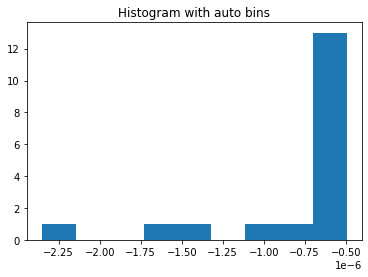

(-2.5465565e-06, -4.7539683e-10)

In [49]:
print(tags[v_q[0]])
scores[v_q[0]]
histogram(h[v_q[100]])
# vv = [v[1] for s, v in scores.items()]
# histogram(vv)
np.min(p), np.max(p)


In [50]:
def choose_tag8(questions, t, s, c, f, cnt):
  q2t = {}
  for q in tqdm(questions):
    q2t[q] = [tuple([t2]) for t2 in t[q] if f[q][t2] < -0.52 + (cnt / 300)]
  return q2t

In [51]:
def choose_tag7(questions, t, s, c, f, cnt):
  q2t = {}
  for q in tqdm(questions):
    q2t[q] = [tuple([t2]) for t2 in t[q][:cnt]]
  return q2t

## 3. Validation Functions

In [52]:
def write_prediction(questions, q2t, dataset_id, fill_blank=True):
    prediction = open(os.path.join(BASE_DIR, DATASETS[dataset_id], PREDICT_VALID.format(DATASETS[dataset_id])), 'w')
    qtions = open(os.path.join(BASE_DIR, DATASETS[dataset_id], Q_VALID.format(DATASETS[dataset_id])), "r")
    non = []
    for q in questions:
      if fill_blank:
        if len(q2t[q]) == 0:
          non.append(q)
          if dataset_id == 0:
            q2t[q].append((1, 15, 135, 5, 2, 6))
          if dataset_id == 1:
            q2t[q].append((195, 75, 1, 43, 119, 1674))
      elif len(q2t[q]) == 0:
        q2t[q].append((-1,))
      tags = []
      [[tags.append(str(s)) for s in s] for s in q2t[q]]
      tags = list(set(tags))
#         prediction.write('195 75 1 43 119 1674'# 597 6 32 7 22 597 37 130 33 102 9 72\n') 
#                          + '\n')
      prediction.write(' '.join(tags) + '\n')
# (195,),(75,),(1,),(43,),(119,),(1674,),(597,),(6,),(32,),(7,),(22,),(195, 597),(37,),(130,),(6, 7),(33,),(6, 195),(102,),(9,),(72,)]

    prediction.close()

In [53]:
from sklearn import metrics

def validate(truth, prediction, offset=-1):
    truth = open(truth, "r")
    pred = open(prediction, "r")
    
    f1 = []
    pr = []
    re = []
    tp = []
    fp = []
    fn = []
    for t, p in zip(truth.readlines()[:offset], pred.readlines()[:offset]):
        t = set([int(t) for t in t.replace('\n', '').split(' ')])
        p = set([int(p) for p in p.replace('\n', '').split(' ')])
        t_p = sum([1 for v in p if v in t])
        f_p = sum([1 for v in p if v not in t])
        f_n = sum([1 for v in t if v not in p])
        precision = len(p.intersection(t)) / len(p) + 1e-6
        recall = len(p.intersection(t)) / len(t) + 1e-6
        pr.append(precision)
        re.append(recall)
        f1.append(2 * precision * recall / (precision + recall))
        tp.append(t_p)
        fp.append(f_p)
        fn.append(f_n)
    f_avg = sum(f1) / len(f1)
    precision = sum(pr) / len(pr)
    recall = sum(re) / len(re)
    return f_avg, precision, recall, tp, fp, fn 

In [54]:
def get_candidates(qs, ac):
    ct = {}
    for q in qs:
        ct[q] = {}
        answerers = q2a[q]
        for a in answerers:
            tc = ac[a]
            for t, c in tc.items():
                if t not in ct:
                    ct[q][t] = 0.0
                ct[q][t] += c
    return ct

In [55]:
def choose_tag0(questions, t, s, c, f, cnt):
  q2t = {}
  for q in tqdm(questions):
    top = []
    for i in range(cnt):
      select = np.random.rand() * vs_total
      for i, v in enumerate(vs_cs):
        if v >= select:
          top.append(ks[i])
          break
    q2t[q] = top
  return q2t

In [56]:
def choose_tag11(questions, t, s, c, f, cnt):
    q2t = {}
    for q in tqdm(questions):
      if dataset_id == 0:
        t = [1, 15, 135, 5, 2, 6, 62, 218, 72, 4, 9, 111, 36, 20, 10, 163, 77, 204, 160, 168, 3, 26, 40, 82, 121, 7, 283, 19, 249, 102, 122, 207, 173, 86, 75, 8, 68, 60, 117, 132, 193, 115, 73, 195, 292, 131, 496, 798, 186, 530, 31, 511, 295, 142, 247, 200, 113, 110, 345, 103, 157, 273, 35, 352, 61, 366, 556, 491, 257, 97, 382, 261, 43, 381, 210, 387, 315, 91, 48, 23, 560, 389, 11, 211, 568, 138, 123, 170, 314, 18, 294, 90, 253, 67, 185, 267, 335, 151, 112, 373]
      else:
        t = [195, 75, 1, 43, 119, 1674, 597, 6, 32, 7, 22, 37, 130, 33, 102, 9, 72, 138, 38, 131, 1042, 3378, 247, 284, 7656, 17019, 379, 274, 50, 10091, 120, 177, 60, 73, 288, 317, 23, 1002, 2009, 33345, 33737, 68, 853, 41, 388, 1130, 228, 647, 27049, 2621, 645, 27, 200, 323, 25231, 114, 19, 52, 26, 47, 1160, 2609, 183, 145, 12572, 143, 922, 747, 162]

        top = [tuple([t]) for t in t[:cnt]]
        q2t[q] = top
    return q2t

In [57]:
def choose_tag1(questions, t, s, c, f, cnt):
    q2t = {}
    for q in tqdm(questions):
        t = top_tags[:50]
#[195, 75, 1, 43, 119, 1674, 597, 6, 32, 7, 22, 37, 130, 33, 3378, 72, 138, 102, 38, 9, 247, 17019, 131, 1042, 50, 7656, 379, 284, 10091, 177, 33345, 274, 317, 120, 288, 2009, 60, 73, 1002, 33737, 41, 200, 23, 2621, 388, 1160, 1130, 2609, 438, 68, 27049, 27, 853, 114, 25231, 183, 228, 647, 19, 52, 645, 323, 614, 382, 143, 2686, 12572, 162, 105, 26, 47, 145, 922, 747, 3209, 31147, 292, 360, 17570, 862, 1702, 1108, 1470, 282, 140, 548, 83, 78, 384, 6922, 340, 295, 211, 10, 5295, 116, 76, 1743, 85, 327, 152, 112, 2078, 1679, 8013, 113, 657, 1855, 41258, 182, 2597, 1756, 456, 20601, 951, 24504, 3514, 4625, 248, 267, 22526, 276, 407, 22733, 664, 809, 122, 3379, 772, 11727, 1623, 546, 34451, 34, 29, 18, 683, 57, 2228, 387, 139, 447, 435, 201, 1085, 115, 1317, 20, 2150, 281, 11352, 1096, 124, 2602, 10247, 4307, 662, 505, 353, 3244, 20213, 204, 28077, 399, 7148, 1157, 333, 196, 11294, 701, 331, 19506, 135, 37171, 214]
        
        top = [tuple([t]) for t in t[:cnt]]
        q2t[q] = top
    return q2t

In [58]:
def choose_tag23(questions, t, s, c, f, cnt):
    q2t = {}
    for q in tqdm(questions):
        q2t[q] = []
        tags = t[q]
        confs = c[q]
        scores = s[q]
        finals = f[q]
        # top_s = [tags[i] for i in np.argsort(scores)[:3]]
#         top_c = [tags[i] for i in np.argsort(confs)[:3]]
#         top_f = [tags[i] for i in np.argsort(finals)[:3]]
        top = [tags[i] for i in np.argsort(confs)[:cnt]]
        # top = [tags[i] for i in np.argsort(scores)[:cnt]]
#         top = [tags[i] for i in np.argsort(confs)[:cnt]]
#         print(top_s, top_c, top_f)
        q2t[q] = top
    return q2t

In [59]:
def choose_tag2(questions, t, s, c, f, cnt):
    q2t = {}
    for q in tqdm(questions):
        q2t[q] = []
        tags = t[q]
        confs = c[q]
        scores = s[q]
        finals = f[q]
        # top_s = [tags[i] for i in np.argsort(scores)[:3]]
#         top_c = [tags[i] for i in np.argsort(confs)[:3]]
#         top_f = [tags[i] for i in np.argsort(finals)[:3]]
        top = [tags[i] for i in np.argsort(finals)[:cnt]]
        # top = [tags[i] for i in np.argsort(scores)[:cnt]]
#         top = [tags[i] for i in np.argsort(confs)[:cnt]]
#         print(top_s, top_c, top_f)
        q2t[q] = top
    return q2t

In [60]:
def choose_tag22(questions, t, s, c, f, cnt):
    q2t = {}
    for q in tqdm(questions):
        q2t[q] = []
        index = [i for i, t in enumerate(t[q]) if len(t) == cnt]
        tags = [t[q][i] for i in index]
        confs = [c[q][i] for i in index]
        scores = [s[q][i] for i in index]
        finals = [f[q][i] for i in index]
        # top_s = [tags[i] for i in np.argsort(scores)[:3]]
#         top_c = [tags[i] for i in np.argsort(confs)[:3]]
#         top_f = [tags[i] for i in np.argsort(finals)[:3]]
        top = [tags[i] for i in np.argsort(finals)[:cnt]]
        # top = [tags[i] for i in np.argsort(scores)[:cnt]]
#         top = [tags[i] for i in np.argsort(confs)[:cnt]]
#         print(top_s, top_c, top_f)
        q2t[q] = top
    return q2t

In [61]:
def choose_tag3(questions, t, s, c, f, th=0.1):
    q2t = {} 
    th = 1 / th
    for q in tqdm(questions):
        q2t[q] = []
        tags = t[q]
        confs = c[q]
        scores = s[q]
        finals = f[q]
#         top_s = [tags[i] for i in np.argsort(scores)[:3]]
#         top_c = [tags[i] for i in np.argsort(confs)[:3]]
#         top_f = [tags[i] for i in np.argsort(finals)[:3]]
        top = [tags[i] for i, f in enumerate(finals) if -f >= th]
#         top = [tags[i] for i in np.argsort(scores)[:cnt]]
#         top = [tags[i] for i in np.argsort(confs)[:cnt]]
#         print(top_s, top_c, top_f)
        q2t[q] = top
    return q2t

## RUN

In [62]:
def run(iter, get_tag_func, offset, v_q, t, s, c, f, fill_blank=True):
  lp = []
  lr = []
  lf = []
  tp = []
  fp = []
  fn = []
  for i in iter:
    p_q2t = get_tag_func(v_q[:offset], t, s, c, f, i)
    write_prediction(v_q[:offset], p_q2t, dataset_id, fill_blank=fill_blank)
    valid_path = os.path.join(BASE_DIR, DATASETS[dataset_id], TAG_VALID.format(DATASETS[dataset_id]))
    predict_path = os.path.join(BASE_DIR, DATASETS[dataset_id], PREDICT_VALID.format(DATASETS[dataset_id]))
    f_avg, pr, re, _tp, _fp, _fn = validate(valid_path, predict_path, offset)
    lf.append(f_avg)
    lr.append(re)
    lp.append(pr)
    tp.append(_tp)
    fp.append(_fp)
    fn.append(_fn)
  return lf, lp, lr, tp, fp, fn

In [63]:
def plot_reward(rewards, window, x_label='episodes', y_label='reward'):
    """
    Function to plot rewards with a rolling mean and standard deviation.
    """
    steps = window

    df = pd.DataFrame({'rewards': rewards})
    m = df.rolling(steps, center=True).agg({'mean':'mean', 'std':'std'})
    m.columns = m.columns.droplevel(1)
    ax = m['mean'].plot()
    ax.fill_between(m.index, m['mean'] - m['std'], m['mean'] + m['std'],
                    alpha=.25)
    plt.tight_layout()
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.show()

def show_me(lf, lp, lr, tp, fp, fn, key=None):
  if key:
    best = np.argmax(lf[key])
    print(np.argmax(lf[key]), max(lf[key]))
    plt.plot(lf[key])
    plt.title(key)
    plt.xlabel('Tag Count')
    plt.ylabel('F1-Score')
    plt.show()
    print(np.argmax(lp[key]), max(lp[key]))
    print(np.argmax(lr[key]), max(lr[key]))
    plt.plot(lp[key], label='percision')
    plt.plot(lr[key], label='recall')
    plt.title(key)
    plt.xlabel('Tag Count')
    plt.ylabel('Percent')
    plt.legend()
    plt.show()

    plt.plot(lr[key], lp[key])
    plt.title(key)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.show()

    # t2 = np.cumsum(tp[key][best])
    # f2 = np.cumsum(fp[key][best])
    # plt.plot(f2, t2)
    # plt.plot([f2[0], f2[-1]], [t2[0], t2[-1]])
    # plt.show()

  else:
    best = {}

    plt.figure(figsize=(15,15))
    for k, v in lf.items():
      best[k] = np.argmax(lf[k])
      plt.plot(lf[k], label=k)
    plt.title('All')
    plt.xlabel('Tag Count')
    plt.ylabel('F1-Score')
    plt.legend()
    plt.show()

    plt.figure(figsize=(15,15))
    for k, p in lp.items():
      plt.plot(p, label=k)
    plt.title('Precision')
    plt.xlabel('Tag Count')
    plt.ylabel('Percent')
    plt.legend()
    plt.show()

    plt.figure(figsize=(15,15))
    for k, r in lr.items():
      plt.plot(r, label=k)
    plt.title('Recall')
    plt.xlabel('Tag Count')
    plt.ylabel('Percent')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(15,15))
    for p, r in zip(lp.items(), lr.items()):
      plt.plot(r[1], p[1], label=p[0])
    plt.title('All')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.show()
    
    for t, f in zip(tp.items(), fp.items()):
      k = t[0]
      t2 = t[1][best[k]]
      f2 = f[1][best[k]]
      t2 = np.cumsum(t2)
      f2 = np.cumsum(f2)
      plt.plot(f2, t2, label=k)
      plt.plot([f2[0], f2[-1]], [t2[0], t2[-1]], label=k+'_base')
    plt.title('All')
    plt.xlabel('False-Positive')
    plt.ylabel('True-Positive')
    plt.legend()
    plt.figure(figsize=(10,10))
    plt.show()


In [64]:
dataset_id = 1
offset = 11000
q2a, a2q = get_answer_info(dataset_id)
_q2a, a2t, q2t, t2q, t2a = get_train_tag(dataset_id, q2a, a2q)
v_q, v_a2t, v_q2t, v_t2q, v_t2a = get_valid_tag(dataset_id, q2a, a2q)
t_q = get_test_query(dataset_id)
t2s = get_pop_score(t2q, a2q, q2a, q2t, 30)
s = np.argsort([-s for s in t2s.values()])
h = [t for t in t2s.keys()]
top_tags = [h[s] for s in s[:100]]

100%|██████████| 30/30 [00:14<00:00,  2.11it/s]


In [65]:
def get_lift(ac, st):
  lift = {}
  for k, v in ac.items():
    lift[k] = {}
    for k2, v2 in v.items():
      if k2 in st:
        lift[k][k2] = v2 / st[k2]
  return lift

In [66]:
ac = get_answerer_conf(a2q, q2t, 6)
st = get_support_set(q2t, 6)
lift = get_lift(ac, st)
vs = [v for k, v in st.items() if len(k) == 1]
ks = [k for k, v in st.items() if len(k) == 1]
vs_total = sum(vs)
vs_cs = np.cumsum(vs)


Associative

In [67]:
q2candidate = get_candidates(v_q[:offset], ac)
t, s, c, f = predict(v_q[:offset], q2candidate, a2q, a2t, q2t, st)

100%|██████████| 11000/11000 [00:15<00:00, 701.54it/s]


Similarity

In [68]:
ct = find_candidate(v_q[:offset])
t2, s2, c2, f2 = find_predict(v_q[:offset], ct, st)

100%|██████████| 11000/11000 [00:03<00:00, 3618.39it/s]


Graph Based

In [69]:
ats = get_answerer_tag_score(a2q, q2t, t2s, 6, False, True)
t3, f3 = predict2(v_q[:offset], ats, a2q, a2t, q2t, st)

100%|██████████| 11000/11000 [00:00<00:00, 12029.18it/s]


In [70]:
k = [k[0] for k in st if len(k) == 1]
v = [-v for k, v in st.items() if len(k) == 1]
h = np.argsort(v)
k2 = [k[a] for a in h[:100]]
print(k2)
print(top_tags)

[195, 75, 1, 43, 119, 1674, 597, 6, 32, 7, 22, 37, 130, 33, 102, 72, 9, 138, 38, 131, 1042, 3378, 247, 284, 7656, 17019, 379, 274, 50, 10091, 120, 177, 60, 73, 288, 317, 23, 1002, 2009, 33345, 33737, 68, 853, 41, 388, 1130, 228, 647, 27049, 2621, 645, 27, 200, 323, 25231, 114, 19, 52, 26, 47, 1160, 2609, 183, 145, 12572, 143, 922, 747, 162, 1702, 438, 105, 292, 83, 3209, 211, 862, 340, 614, 116, 31147, 140, 10, 2686, 384, 85, 1470, 112, 78, 152, 1108, 382, 76, 1679, 6922, 1743, 657, 20601, 295, 4625]
[195, 75, 1, 43, 119, 1674, 597, 6, 32, 7, 22, 37, 130, 33, 3378, 72, 138, 102, 38, 9, 247, 17019, 131, 1042, 50, 7656, 379, 284, 10091, 177, 33345, 274, 317, 120, 288, 2009, 60, 73, 1002, 33737, 41, 200, 23, 2621, 388, 1160, 1130, 2609, 438, 68, 27049, 27, 853, 114, 25231, 183, 228, 647, 19, 52, 645, 323, 614, 382, 143, 2686, 12572, 162, 105, 26, 47, 145, 922, 747, 3209, 31147, 292, 360, 17570, 862, 1702, 1108, 1470, 282, 140, 548, 83, 78, 384, 6922, 340, 295, 211, 10, 5295, 116, 76, 1743

In [71]:
lf = {}
lp = {}
lr = {}
tp = {}
fp = {}
fn = {}

In [72]:
## Get Things Ready!
keys = ['random', 'top-freq', 'similarity', 'top-rank', 'associative_top', 'graph', 'NN', 'NN']
funcs = [choose_tag0, choose_tag1, choose_tag4, choose_tag11, choose_tag22, choose_tag5, choose_tag8, choose_tag7]
iter = range(1,30)


100%|██████████| 11000/11000 [00:01<00:00, 8805.66it/s]


4 0.0841499488440193


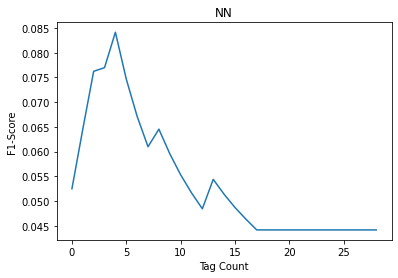

0 0.10045554545455225
17 0.17628584848489093


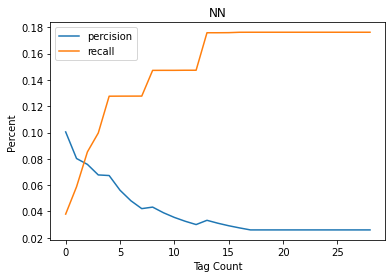

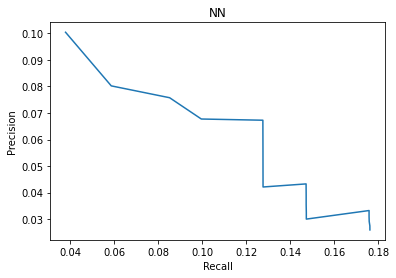

In [73]:
i = 7
lf[keys[i]], lp[keys[i]], lr[keys[i]], tp[keys[i]], fp[keys[i]], fn[keys[i]] = run(iter, funcs[i], offset, v_q, tags, _, _, scores, fill_blank=False)

show_me(lf, lp, lr, tp, fp, fn, key=keys[i])

100%|██████████| 11000/11000 [00:00<00:00, 343077.04it/s]


0 0.0981640809286445


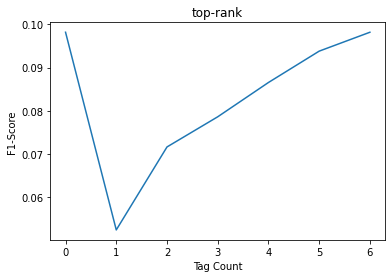

1 0.10045554545455225
0 0.1692949393939805


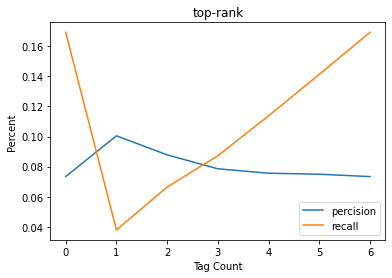

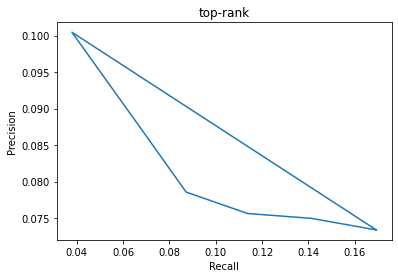

In [74]:
i = 3
lf[keys[i]], lp[keys[i]], lr[keys[i]], tp[keys[i]], fp[keys[i]], fn[keys[i]] = run(range(0,7), funcs[i], offset, v_q, _, _, _, _)

show_me(lf, lp, lr, tp, fp, fn, key=keys[i])

In [75]:
## Part 0: Baselines
i = 0
lf[keys[i]], lp[keys[i]], lr[keys[i]], tp[keys[i]], fp[keys[i]], fn[keys[i]] = run(iter, funcs[i], offset, v_q, _, _, _, _)

i = 1
lf[keys[i]], lp[keys[i]], lr[keys[i]], tp[keys[i]], fp[keys[i]], fn[keys[i]] = run(iter, funcs[i], offset, v_q, _, _, _, _)

i = 3
lf[keys[i]], lp[keys[i]], lr[keys[i]], tp[keys[i]], fp[keys[i]], fn[keys[i]] = run(iter, funcs[i], offset, v_q, _, _, _, _)


## Part 1: Associative Rules
# i = 4
# lf[keys[i]], lp[keys[i]], lr[keys[i]], tp[keys[i]], fp[keys[i]], fn[keys[i]] = run(iter, funcs[i], offset, v_q, t, s, c, f, fill_blank=False)

# i = 3
# lf[keys[i]], lp[keys[i]], lr[keys[i]], tp[keys[i]], fp[keys[i]], fn[keys[i]] = run(range(6,36), funcs[i], offset, v_q, t, s, c, f, fill_blank=False)

# i = 6
# lf[keys[i]], lp[keys[i]], lr[keys[i]], tp[keys[i]], fp[keys[i]], fn[keys[i]] = run(iter, funcs[i], offset, v_q, t, s, c, f, fill_blank=False)

# Part 2: Similarity 
i = 2
lf[keys[i]], lp[keys[i]], lr[keys[i]], tp[keys[i]], fp[keys[i]], fn[keys[i]] = run(iter, funcs[i], offset, v_q, t2, s2, c2, f2, fill_blank=True)


# Part 3: Graph
i = 5
lf[keys[i]], lp[keys[i]], lr[keys[i]], tp[keys[i]], fp[keys[i]], fn[keys[i]] = run(iter, funcs[i], offset, v_q, t3, f3, c2, f2, fill_blank=True)

# # Part 4: NN
# i = 7
# lf[keys[i]], lp[keys[i]], lr[keys[i]], tp[keys[i]], fp[keys[i]], fn[keys[i]] = run(iter, funcs[i], offset, v_q, _, _, _, _, fill_blank=True)

  0%|          | 0/11000 [00:00<?, ?it/s]


IndexError: ignored

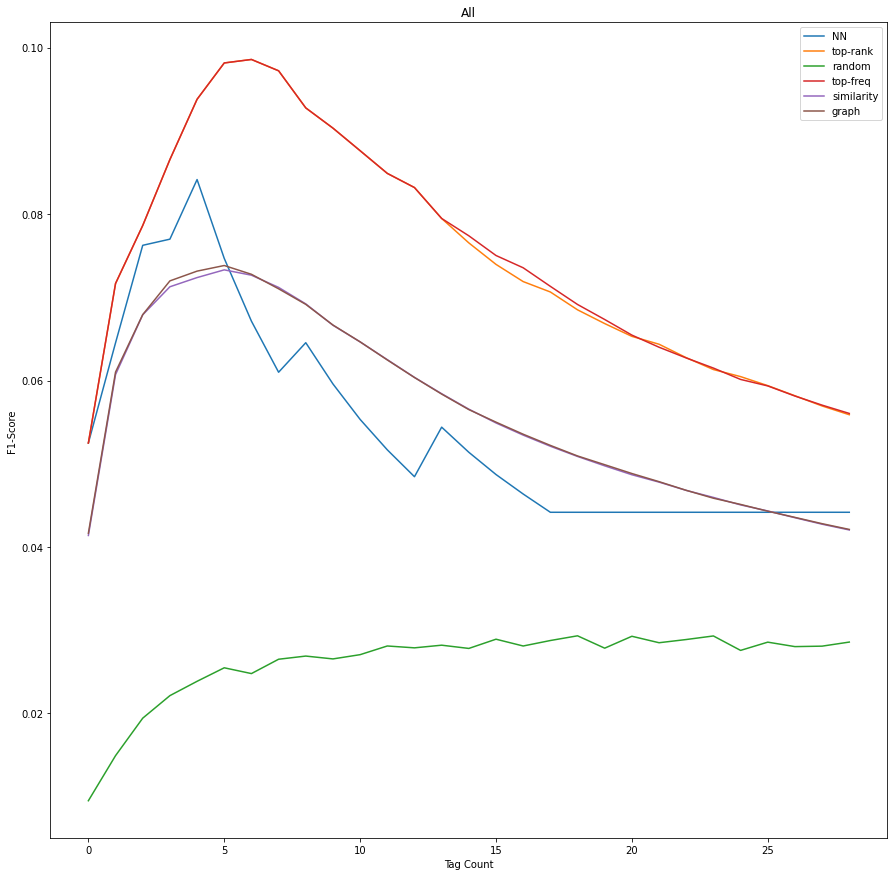

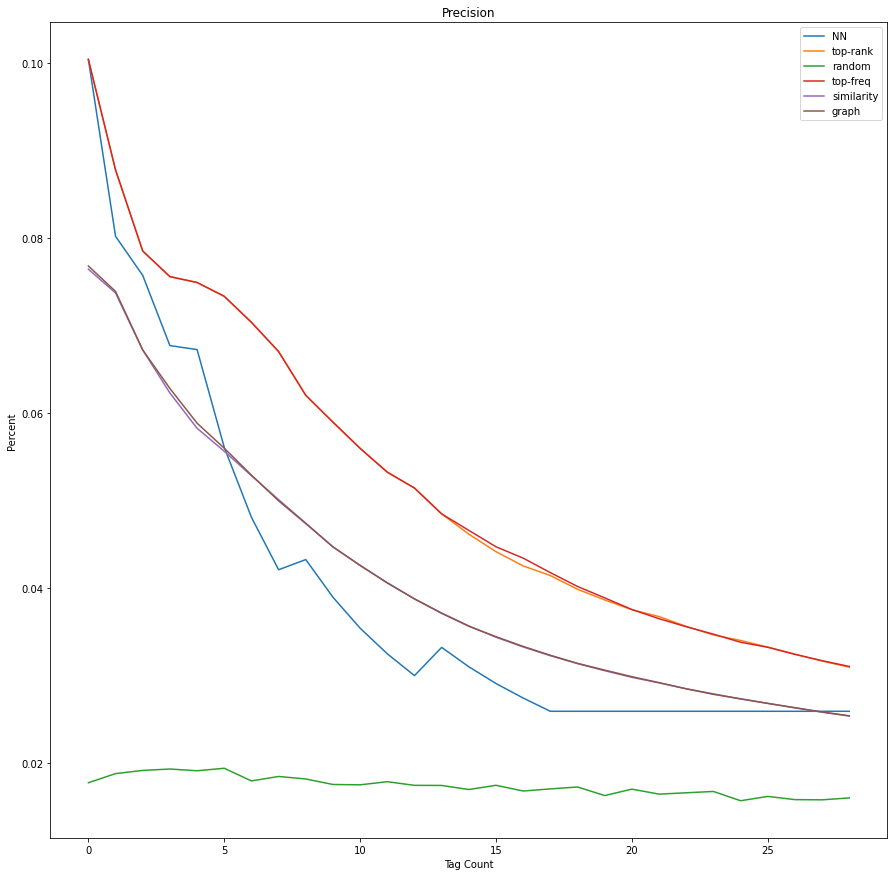

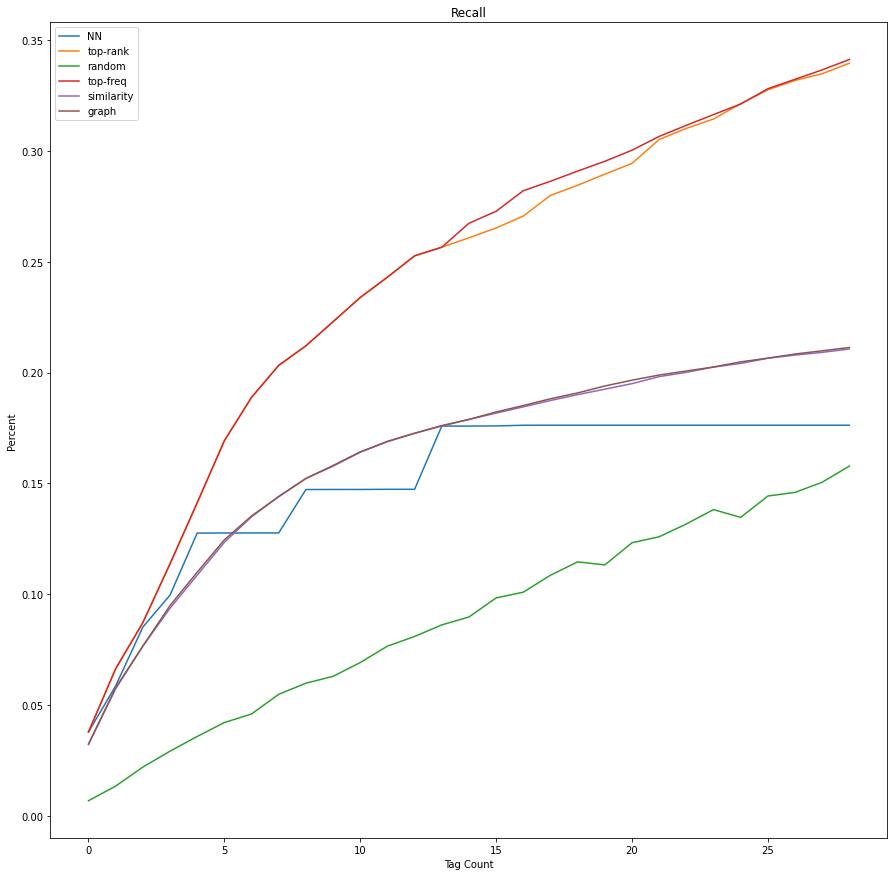

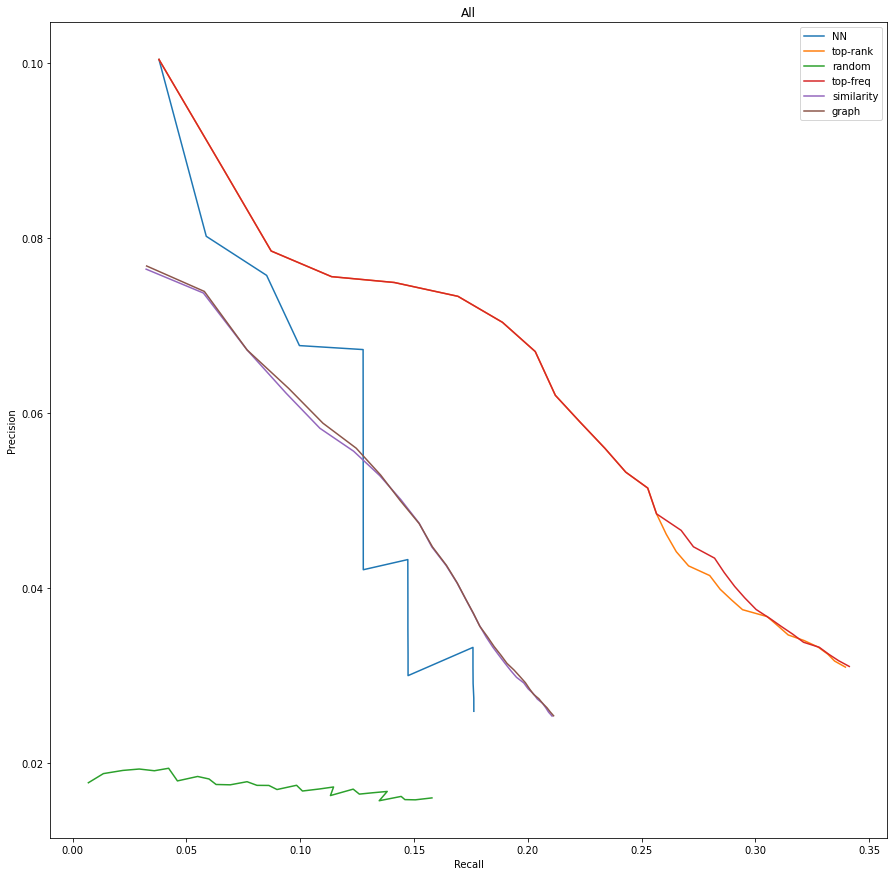

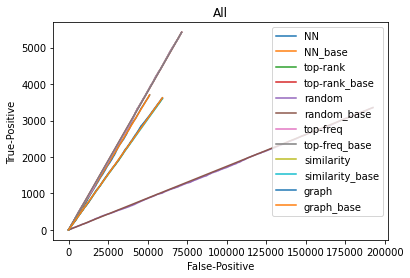

<Figure size 720x720 with 0 Axes>

In [76]:
show_me(lf, lp, lr, tp, fp, fn)

95704 95704 119630 95704


[2021-07-13 23:53:05,926] [DEBUG] [matplotlib.font_manager]  findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
[2021-07-13 23:53:05,927] [DEBUG] [matplotlib.font_manager]  findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
[2021-07-13 23:53:05,928] [DEBUG] [matplotlib.font_manager]  findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
[2021-07-13 23:53:05,930] [DEBUG] [matplotlib.font_manager]  findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
[2021-07-13 23:53:05,930] [DEBUG] [matplotlib.font_manager]  findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05
[2021-07-13 23:53:05,931] [DEBUG] [matplotlib.font_manager]  findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal 700 normal>) = 10.335
[2021-07-13 23:53:05,932] [DEBUG] [matplotlib.font_manager]  findfont: sco

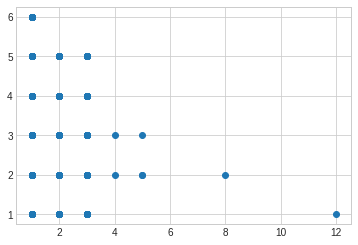

In [77]:
q2 = {}
q3 = {}
for q, a in q2a.items():
  q2[q] = len(a)
 
for q, t in q2t.items():
  q3[q] = len(t)

a = []
b = []
s = {}
for q in q2t:
  a.append(q2[q])
  b.append(q3[q])
  if (a[-1], b[-1]) not in s:
    s[(a[-1], b[-1])] = 0.0 
  s[(a[-1], b[-1])] += 1

print(len(a), len(b), len(q2), len(q3))
plt.style.use('seaborn-whitegrid')
plt.scatter(a,b)

[2021-07-13 23:53:06,561] [DEBUG] [matplotlib.font_manager]  findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
[2021-07-13 23:53:06,563] [DEBUG] [matplotlib.font_manager]  findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
[2021-07-13 23:53:06,564] [DEBUG] [matplotlib.font_manager]  findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
[2021-07-13 23:53:06,567] [DEBUG] [matplotlib.font_manager]  findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
[2021-07-13 23:53:06,569] [DEBUG] [matplotlib.font_manager]  findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05
[2021-07-13 23:53:06,570] [DEBUG] [matplotlib.font_manager]  findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal 700 normal>) = 10.335
[2021-07-13 23:53:06,572] [DEBUG] [matplotlib.font_manager]  findfont: sco

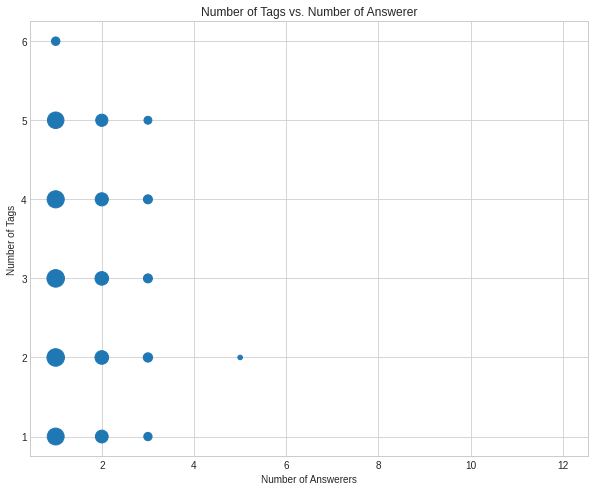

In [78]:
x = []
y = []
sizes = []
for k, v in s.items():
  x.append(k[0])
  y.append(k[1])
  sizes.append(np.log(v) * 30)
plt.figure(figsize=(10,8))
plt.style.use('seaborn-whitegrid')
plt.title('Number of Tags vs. Number of Answerer')
plt.xlabel('Number of Answerers')
plt.ylabel('Number of Tags')
plt.scatter(x,y, s=sizes, cmap='viridis')

In [79]:
sim = {}
for q in v_q:
  answerers = q2a[q]
  for a in answerers:
    for q2 in a2q[a]:
      if q2 != q:
        sim[(q,q2)] = len(set(answerers).intersection(set(q2a[q2]))) / len(set(answerers).union(set(q2a[q2])))
print(len(sim))

sim2 = {}
for k in sim:
  q = k[0]
  q2 = k[1]
  t1 = v_q2t[q]
  if q2 in v_q2t:
    t2 = v_q2t[q2]  
  elif q2 in q2t:
    t2 = q2t[q2]
  else:
    t2 = []
  sim2[k] = len(set(t1).intersection(set(t2))) / len(set(t1).union(set(t2)))

print(len(sim2))

2078766
2078766


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

for i in range(1, 6):
  a = np.zeros((2**i,2**i))

  plt.figure(figsize=(10,8))

  for k, v in sim.items():
    # if sim2[k] > 0:# and v > 0:
      # print(int(v * 10), int(sim2[k] * 10))
      a[int(sim2[k] * (2**i - 1))][int(v * (2**i - 1))] += 1
  # a[0][0] = 0
  a = np.log2(a + 1)
  ax = sns.heatmap(a, annot=False)
  ax.invert_yaxis()
  plt.title('Question Similarity in Tags vs. Answerers')
  plt.ylabel('Question Similarity in Tags')
  plt.xlabel('Question Similarity in Answerers')
  plt.show()

In [ ]:
x = []
y = []
s = []
for k, v in sim.items():
  # if sim2[k] > 0:
    x.append(v)
    y.append(sim2[k])
    s.append(10)
print(len(x), len(y))
min(x), min(y)

In [ ]:
plt.scatter(x,y, s=s)

In [ ]:
good_q = []
for k, v in sim.items():
  if v >= 0.5 and sim2[k] >= 0.5:
    good_q.append(k[0])
    good_q.append(k[1])
print(len(good_q))
uniq_g = np.unique(good_q, return_counts=True)
print(len(uniq_g[0]))

bad_q = []
for k, v in sim.items():
  if sim2[k] > 0:
    if (v < 0.5) or (sim2[k] < 0.5):
      if k[0] == 32789 or k[1] == 32789:
        print(k, v, sim2[k])
      bad_q.append(k[0])
      bad_q.append(k[1])

print(len(bad_q))
uniq_b = np.unique(bad_q, return_counts=True)
print(len(uniq_b[0]))

In [ ]:
if 32789 in bad_q:
  print(1)

In [ ]:
gg = []
for q in uniq_g[0]:
  if q not in uniq_b[0]:
    gg.append(q)
len(gg)

In [ ]:
gg = {}
for i, q in enumerate(uniq_g[0]):
  if q in uniq_b[0]:
    j = np.where(uniq_b[0] == q)
    gg[q] = uniq_g[1][i] - uniq_b[1][j]


In [ ]:
aa = {}
for k, v in a2t.items():
  v = tuple(np.unique(v))
  if tuple(v) not in aa:
    aa[tuple(v)] = []
  aa[tuple(v)].append(k)
len(aa)

In [ ]:
len(a2q)